Multiclass classification
* Become one with the data
* preprocess the data(get it ready fot the model)
* create the model
* fit the model
* evaluate the model
* adjust different hyperparameters and improve the models performance
* adjust untill satisfied 

In [1]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


In [2]:
import zipfile 
import os

In [3]:
# zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()

In [4]:
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
    print('There are {} files and {} directories in {}'.format(len(filenames), len(dirnames), (dirpath)))

There are 0 files and 2 directories in 10_food_classes_all_data
There are 0 files and 10 directories in 10_food_classes_all_data\test
There are 250 files and 0 directories in 10_food_classes_all_data\test\chicken_curry
There are 250 files and 0 directories in 10_food_classes_all_data\test\chicken_wings
There are 250 files and 0 directories in 10_food_classes_all_data\test\fried_rice
There are 250 files and 0 directories in 10_food_classes_all_data\test\grilled_salmon
There are 250 files and 0 directories in 10_food_classes_all_data\test\hamburger
There are 250 files and 0 directories in 10_food_classes_all_data\test\ice_cream
There are 250 files and 0 directories in 10_food_classes_all_data\test\pizza
There are 250 files and 0 directories in 10_food_classes_all_data\test\ramen
There are 250 files and 0 directories in 10_food_classes_all_data\test\steak
There are 250 files and 0 directories in 10_food_classes_all_data\test\sushi
There are 0 files and 10 directories in 10_food_classes_al

In [5]:
import pathlib
import numpy as np

data_dir = pathlib.Path('10_food_classes_all_data/train')
class_names = np.array(sorted(items.name for items in data_dir.glob('*')))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Becoming one with the data by visualization


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [7]:
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    image = mpimg.imread(target_folder + '/'+ random_image[0])
    plt.imshow(image)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {image.shape}')
    return image

['2357097.jpg']
Image shape: (384, 512, 3)


array([[[ 46,  35,  29],
        [ 46,  35,  29],
        [ 46,  35,  29],
        ...,
        [147, 162, 169],
        [148, 163, 170],
        [148, 163, 170]],

       [[ 46,  35,  29],
        [ 45,  34,  28],
        [ 45,  34,  28],
        ...,
        [148, 163, 170],
        [149, 164, 171],
        [150, 165, 172]],

       [[ 46,  35,  29],
        [ 46,  35,  29],
        [ 46,  35,  29],
        ...,
        [148, 163, 170],
        [148, 163, 170],
        [149, 164, 171]],

       ...,

       [[177, 195, 197],
        [173, 191, 193],
        [176, 191, 194],
        ...,
        [183, 198, 203],
        [182, 197, 202],
        [181, 196, 201]],

       [[177, 195, 197],
        [175, 193, 195],
        [179, 194, 197],
        ...,
        [183, 198, 203],
        [182, 197, 202],
        [180, 195, 200]],

       [[174, 192, 194],
        [174, 192, 194],
        [181, 195, 198],
        ...,
        [182, 197, 202],
        [181, 196, 201],
        [180, 195, 200]]

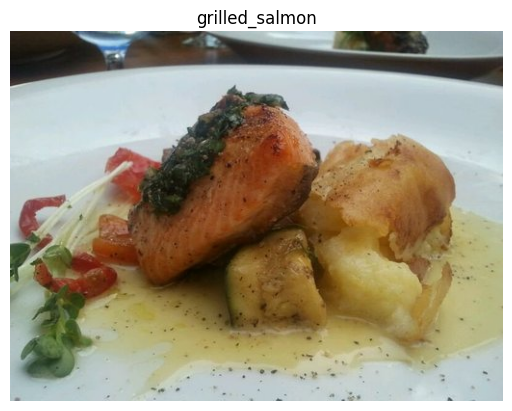

In [8]:
view_image('10_food_classes_all_data/train/', 'grilled_salmon')

['1531389.jpg']
Image shape: (429, 512, 3)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

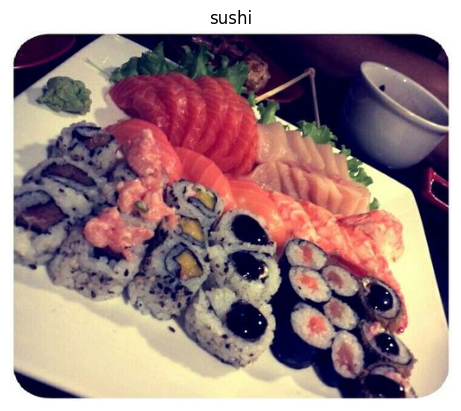

In [9]:
view_image('10_food_classes_all_data/train/', 'sushi')

Using `ImageDataGenerator` to recale the image data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
Train_data_gen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=0.5,
                                    zoom_range=0.5,
                                    horizontal_flip=True)
Test_data_gen = ImageDataGenerator(rescale=1./255)

train_dir = '10_food_classes_all_data/train'
test_dir = '10_food_classes_all_data/test'


train_data = Train_data_gen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode= 'categorical',
                                                shuffle=True)

test_data = Test_data_gen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size =32,
                                              class_mode = 'categorical',
                                              shuffle=True)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [12]:
# model definition
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(16, 3, input_shape=(224, 224, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(16, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# model compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       108,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,258 (442.41 KB)

 Trainable params: 113,258 (442.41 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_data,
    epochs =10,
    validation_data = test_data
)

Epoch 1/10


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 181s 726ms/step - accuracy: 0.1616 - loss: 2.2584 - val_accuracy: 0.3032 - val_loss: 1.9905
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 168s 699ms/step - accuracy: 0.2572 - loss: 2.0450 - val_accuracy: 0.3408 - val_loss: 1.8717
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 174s 722ms/step - accuracy: 0.3070 - loss: 1.9642 - val_accuracy: 0.3408 - val_loss: 1.9064
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 185s 769ms/step - accuracy: 0.3263 - loss: 1.9315 - val_accuracy: 0.3760 - val_loss: 1.7986
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 178s 744ms/step - accuracy: 0.3609 - loss: 1.8735 - val_accuracy: 0.4076 - val_loss: 1.7508
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 629ms/step - accuracy: 0.3839 - loss: 1.8191 - val_accuracy: 0.4244 - val_loss: 1.6946
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 146s 608ms/step - accuracy: 0.3973 - loss: 1.7750 - val_accuracy: 0.4344 - val_loss: 1.6644
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 152s 634ms/step - accuracy: 0.4160 - loss: 1.71

In [14]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.4811 - loss: 1.5810


[1.5589230060577393, 0.48240000009536743]

In [15]:
def loss_function(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epoch = range(len(loss))

    plt.figure()
    plt.plot(epoch, val_loss, label='val-loss')
    plt.plot(epoch, loss, label='loss')
    plt.title('loss-curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(epoch, val_accuracy, label='val-accuracy')
    plt.plot(epoch, accuracy, label='accuracy')
    plt.title('Accuracy-curve')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

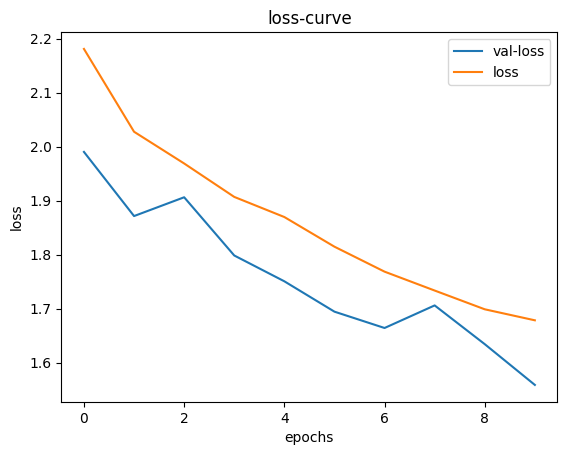

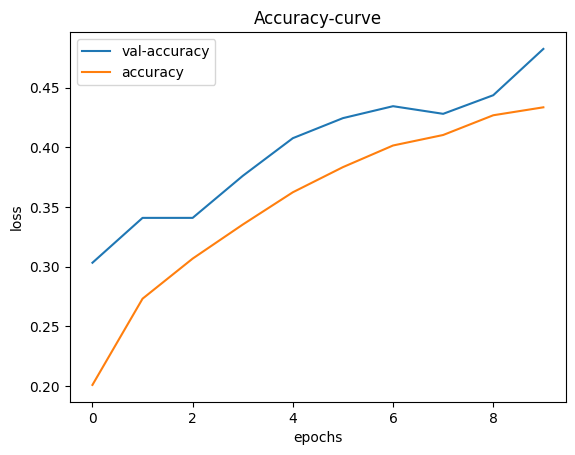

In [16]:
loss_function(history)

Uploading customes data to make predictions

In [17]:
# getting the file in its right format
image_size = 224

def load_file(filename, image_size=image_size):
    # getting the data
    image = tf.io.read_file(filename)
    # decode the image into tensors
    image = tf.image.decode_image(image)
    # resize the image
    image = tf.image.resize(image, size=[image_size,image_size])
    # rescale the image
    image = image/225.0
    return image


In [18]:
load_file('03-steak.jpeg')

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [19]:
def load_and_predict(model, file, class_names=class_names):
    image = load_file(file, image_size)

    predictions = model.predict(tf.expand_dims(image,axis=0))

    # pred_index = tf.argmax(predictions)
    if len(predictions[0])>1:
        pred_class = class_names[tf.argmax(predictions[0])]
    else:
        pred_class = class_names[int(tf.round(predictions[0]))]
    
    # plot predictions
    plt.imshow(image)
    plt.title(pred_class)
    plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


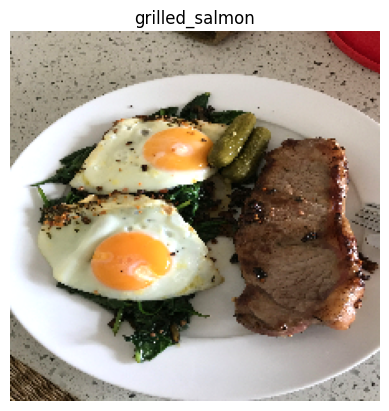

In [20]:
load_and_predict(model, file='03-steak.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


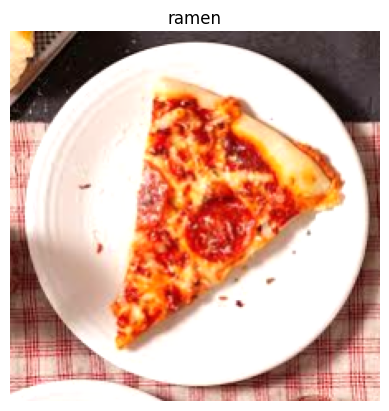

In [21]:
load_and_predict(model, file='download.jpg')

In [23]:
model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.4848 - loss: 1.5666


[1.5589231252670288, 0.48240000009536743]

Save and load the model

In [22]:
model.save('multi-class-model.h5')

In [24]:
# loaading model
loaded_model = tf.keras.models.load_model('multi-class-model.h5')
loaded_model.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.4981 - loss: 1.5344


[1.5589232444763184, 0.48240000009536743]